In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Data
## Let's start by loading the dataset and taking a quick look at its structure.

In [348]:
# Load the dataset
file_path = '/content/data.csv'
df = pd.read_csv(file_path, encoding='unicode_escape')#encoding='unicode_escape'ISO-8859-1

# Display the first few rows of the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Preprocessing
### Before diving into analysis, we need to preprocess the data. This includes handling missing values, converting data types, and creating new features if necessary.

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [350]:
# Check for missing values
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [351]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## there are many minus value in unitprice and Quantity columns

In [352]:
# Get the indices of rows where 'Quantity' is less than or equal to 0
indices_to_drop = df[df['Quantity'] <= 0].index

# Drop the rows using the indices
df = df.drop(indices_to_drop)

In [353]:
# Get the indices of rows where 'Quantity' is less than or equal to 0
indices_to_drop = df[df['UnitPrice'] <= 0].index

# Drop the rows using the indices
df = df.drop(indices_to_drop)

In [354]:
# check datatypes
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [355]:
# as we have datetime data, lets cast it to datetime type

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#df = df.set_index('InvoiceNo')

df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


# Check Null values

In [357]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,132220
Country,0


In [358]:
# Resetting the index is required for assigning columns after removing rows
df = df.reset_index(drop=True)

## there are multiples null values in 'CustomerID','Description'

In [359]:
# dropping CustomerID column as it has too many null values
df = df.drop(columns=['CustomerID','Description'])


In [360]:
# Create a new feature: TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Display the first few rows after preprocessing
df.tail(100)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
530004,581579,85099C,10,2011-12-09 12:19:00,1.79,United Kingdom,17.90
530005,581579,20713,10,2011-12-09 12:19:00,1.79,United Kingdom,17.90
530006,581579,21931,10,2011-12-09 12:19:00,1.79,United Kingdom,17.90
530007,581579,23199,30,2011-12-09 12:19:00,1.79,United Kingdom,53.70
530008,581579,23353,12,2011-12-09 12:19:00,0.83,United Kingdom,9.96
...,...,...,...,...,...,...,...
530099,581587,22613,12,2011-12-09 12:50:00,0.85,France,10.20
530100,581587,22899,6,2011-12-09 12:50:00,2.10,France,12.60
530101,581587,23254,4,2011-12-09 12:50:00,4.15,France,16.60
530102,581587,23255,4,2011-12-09 12:50:00,4.15,France,16.60


In [314]:
df.tail(100)

,StockCode,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
InvoiceNo,,,,,,
581579,85099C,10,2011-12-09 12:19:00,1.79,United Kingdom,17.90
581579,20713,10,2011-12-09 12:19:00,1.79,United Kingdom,17.90
581579,21931,10,2011-12-09 12:19:00,1.79,United Kingdom,17.90
581579,23199,30,2011-12-09 12:19:00,1.79,United Kingdom,53.70
581579,23353,12,2011-12-09 12:19:00,0.83,United Kingdom,9.96
...,...,...,...,...,...,...
581587,22613,12,2011-12-09 12:50:00,0.85,France,10.20
581587,22899,6,2011-12-09 12:50:00,2.10,France,12.60
581587,23254,4,2011-12-09 12:50:00,4.15,France,16.60


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530104 entries, 0 to 530103
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Quantity     530104 non-null  int64         
 3   InvoiceDate  530104 non-null  datetime64[ns]
 4   UnitPrice    530104 non-null  float64       
 5   Country      530104 non-null  object        
 6   TotalPrice   530104 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.3+ MB


In [362]:
# Remove duplicates and keep the first occurrence
df = df.drop_duplicates(keep='first')

# Display the DataFrame without duplicates
print(df)

       InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
0         536365    85123A         6 2010-12-01 08:26:00       2.55   
1         536365     71053         6 2010-12-01 08:26:00       3.39   
2         536365    84406B         8 2010-12-01 08:26:00       2.75   
3         536365    84029G         6 2010-12-01 08:26:00       3.39   
4         536365    84029E         6 2010-12-01 08:26:00       3.39   
...          ...       ...       ...                 ...        ...   
530099    581587     22613        12 2011-12-09 12:50:00       0.85   
530100    581587     22899         6 2011-12-09 12:50:00       2.10   
530101    581587     23254         4 2011-12-09 12:50:00       4.15   
530102    581587     23255         4 2011-12-09 12:50:00       4.15   
530103    581587     22138         3 2011-12-09 12:50:00       4.95   

               Country  TotalPrice  
0       United Kingdom       15.30  
1       United Kingdom       20.34  
2       United Kingdom       22.00  

In [363]:
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 0 duplicate rows that need to be removed.


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524876 entries, 0 to 530103
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524876 non-null  object        
 1   StockCode    524876 non-null  object        
 2   Quantity     524876 non-null  int64         
 3   InvoiceDate  524876 non-null  datetime64[ns]
 4   UnitPrice    524876 non-null  float64       
 5   Country      524876 non-null  object        
 6   TotalPrice   524876 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.0+ MB


# Exploratory Data Analysis (EDA)
Let's explore the data to uncover interesting patterns and trends.

In [365]:
# Summary statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,TotalPrice
count,524876.000000,524876,524876.000000,524876.000000
mean,10.616064,2011-07-04 15:30:02.360900608,3.922575,20.274425
min,1.000000,2010-12-01 08:26:00,0.001000,0.001000
25%,1.000000,2011-03-28 12:13:00,1.250000,3.900000
50%,4.000000,2011-07-20 11:22:00,2.080000,9.920000
75%,11.000000,2011-10-19 11:41:00,4.130000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,168469.600000
std,156.279818,NaN,36.093096,271.693148


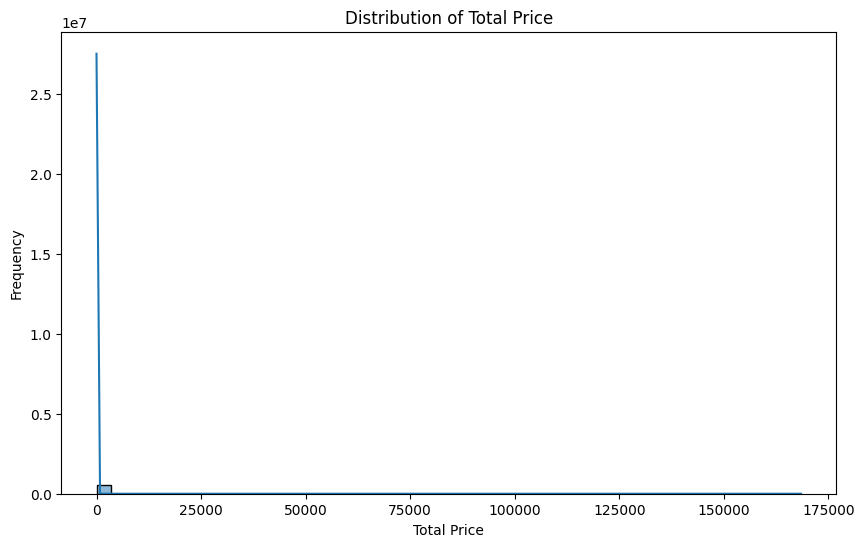

In [366]:
# Distribution of TotalPrice

plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

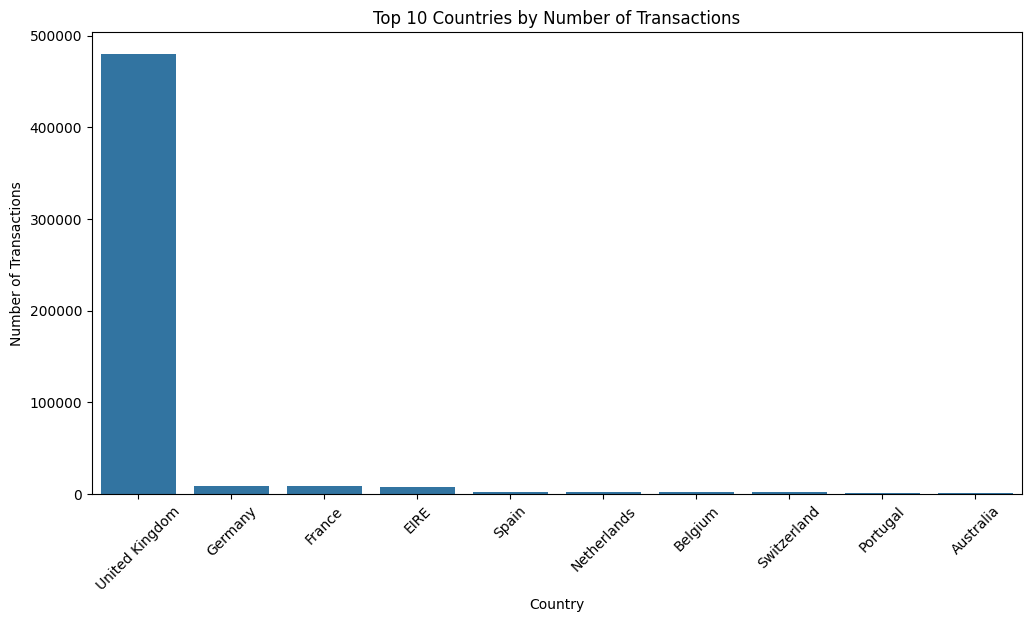

In [367]:
# Top 10 countries by number of transactions
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis
Let's examine the correlations between numeric features to see if there are any interesting relationships

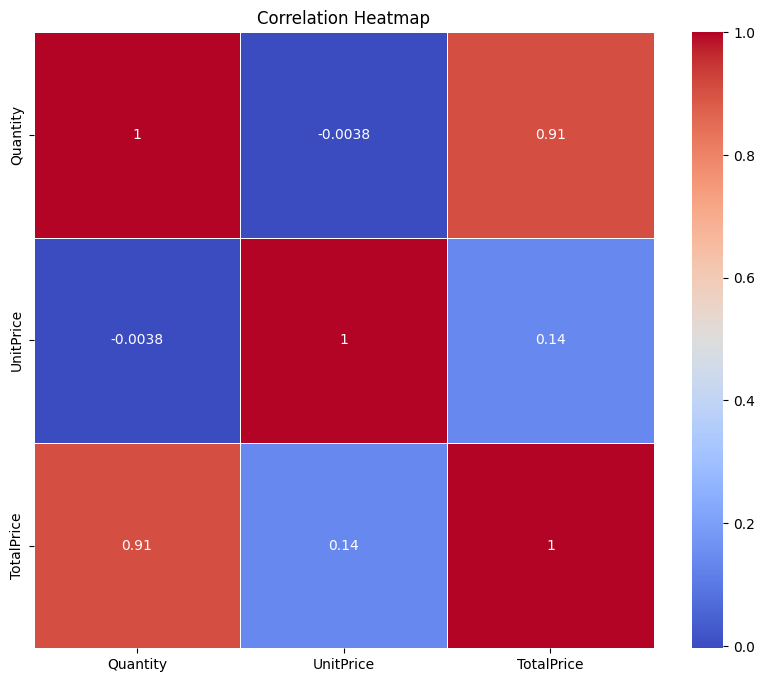

In [368]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##  Extracting Date/Time Features from 'InvoiceDate'

In [369]:
df_1=df.copy()
df_1['InvoiceYear'] = df['InvoiceDate'].dt.year
df_1['InvoiceMonth'] = df['InvoiceDate'].dt.month
df_1['InvoiceDay'] = df['InvoiceDate'].dt.day
df_1['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
df_1['InvoiceHour'] = df['InvoiceDate'].dt.hour

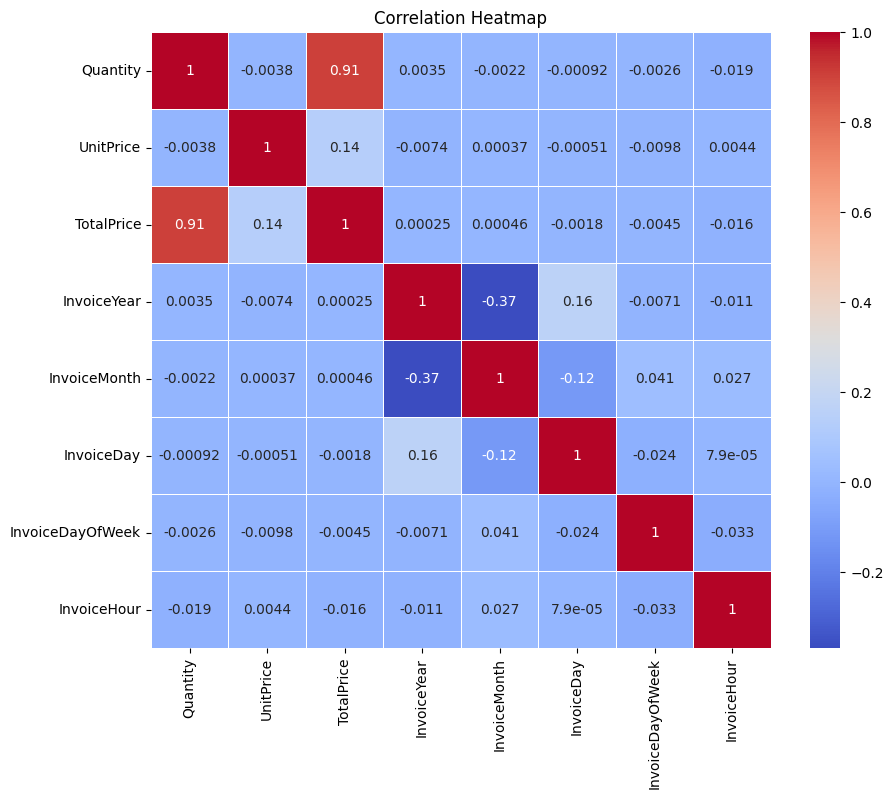

In [370]:
# Select only numeric columns
numeric_df = df_1.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

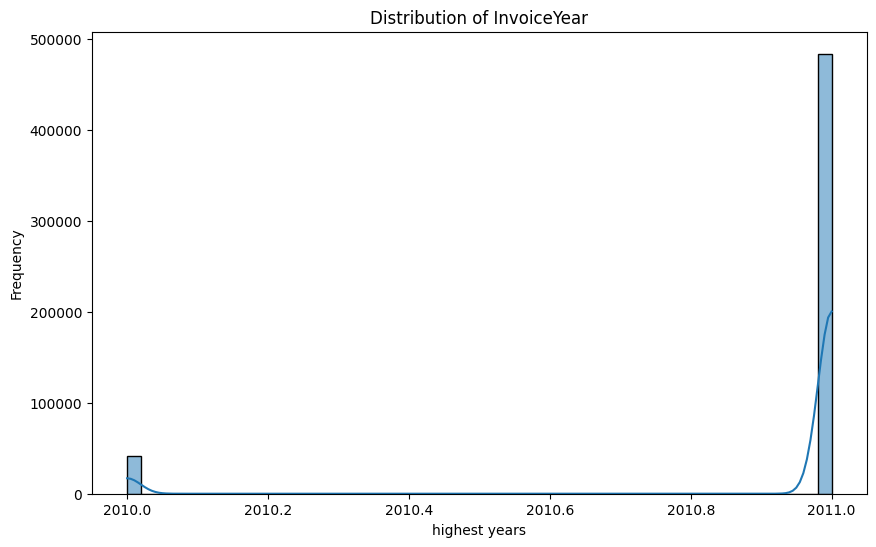

In [371]:
# Distribution of year
plt.figure(figsize=(10, 6))
sns.histplot(df_1['InvoiceYear'], bins=50, kde=True)
plt.title('Distribution of InvoiceYear')
plt.xlabel('highest years')
plt.ylabel('Frequency')
plt.show()

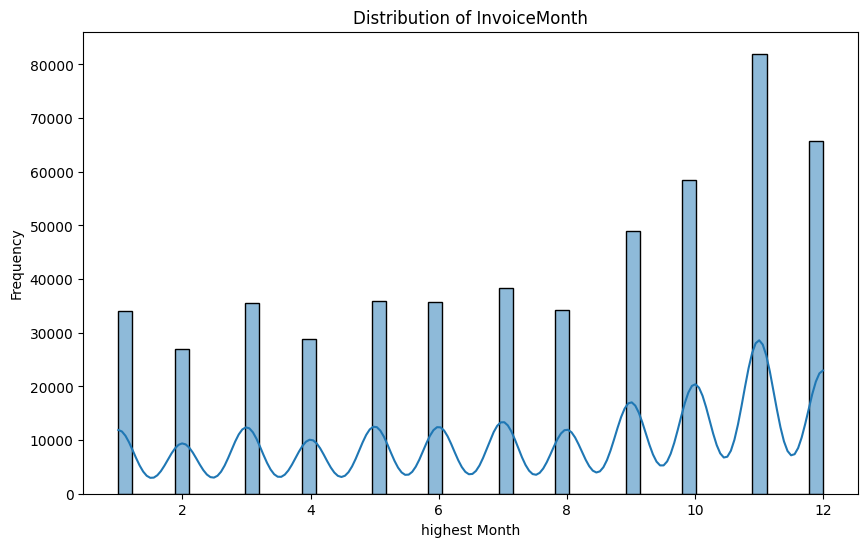

In [372]:
# Distribution of month
plt.figure(figsize=(10, 6))
sns.histplot(df_1['InvoiceMonth'], bins=50, kde=True)
plt.title('Distribution of InvoiceMonth')
plt.xlabel('highest Month')
plt.ylabel('Frequency')
plt.show()

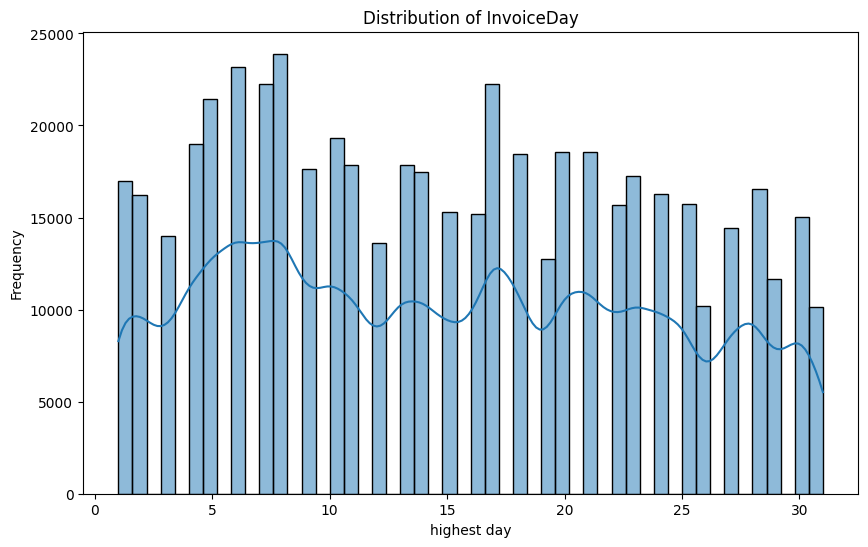

In [373]:
# Distribution of days
plt.figure(figsize=(10, 6))
sns.histplot(df_1['InvoiceDay'], bins=50, kde=True)
plt.title('Distribution of InvoiceDay')
plt.xlabel('highest day')
plt.ylabel('Frequency')
plt.show()

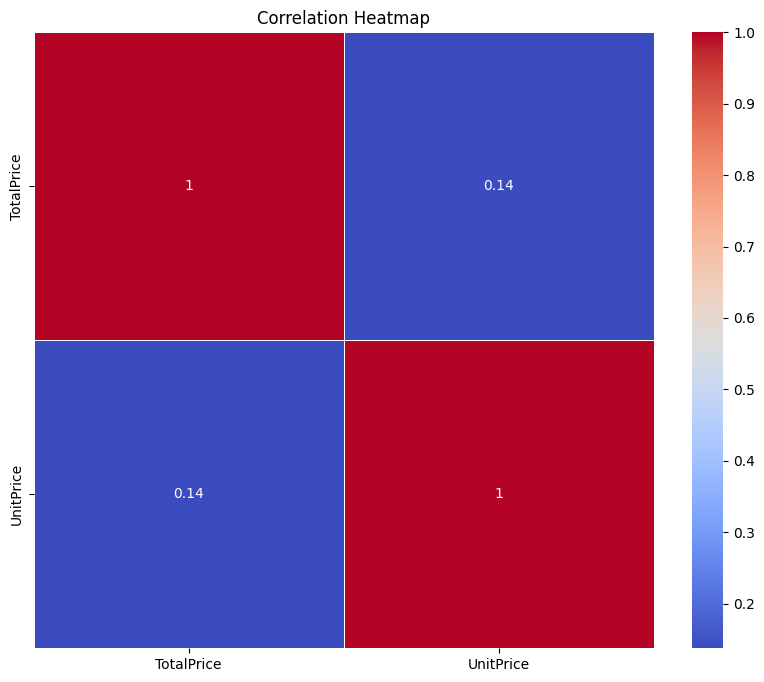

In [374]:
#  Select the columns of interest:
correlation_df = df_1[['TotalPrice', 'UnitPrice']]

#  Calculate the correlation matrix:
correlation_matrix = correlation_df.corr()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Detect outlier

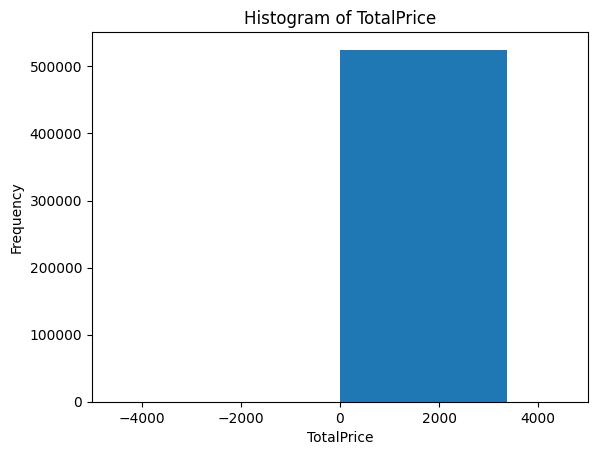

In [375]:
import matplotlib.pyplot as plt
plt.xlim(-5000,5000)
plt.hist(df['TotalPrice'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of TotalPrice')
plt.xlabel('TotalPrice')
plt.ylabel('Frequency')
plt.show()

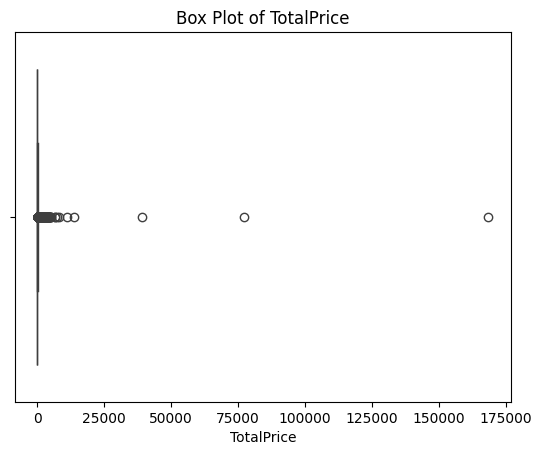

In [376]:
import seaborn as sns

sns.boxplot(x=df['TotalPrice'])
plt.title('Box Plot of TotalPrice')
plt.show()

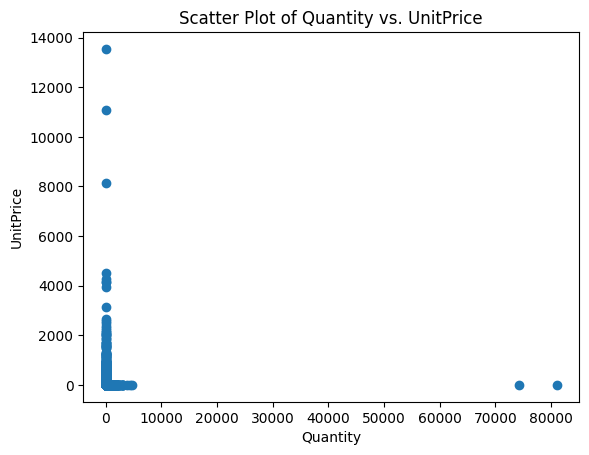

In [377]:
plt.scatter(df['Quantity'], df['UnitPrice'])
plt.title('Scatter Plot of Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In [407]:
import numpy as np

def detect_outliers_iqr(data, column_name):
  """Detects outliers in a specific column using the IQR method.

  Args:
    data: The Pandas DataFrame.
    column_name: The name of the column to check for outliers.

  Returns:
    A list of indices of the outlier rows.
  """

  Q1 = data[column_name].quantile(0.25)
  Q3 = data[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)].index.tolist()
  return outliers
# index outlier
outlier_indices = detect_outliers_iqr(df, 'TotalPrice')


In [381]:
# delete outlier indisis'outlier_indices'
cleaned_df = df.drop(index=outlier_indices)

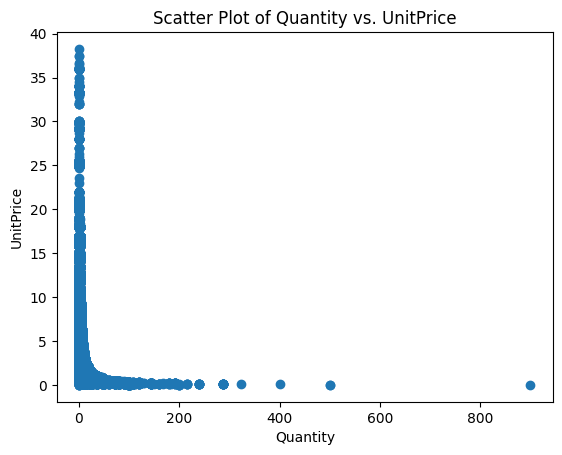

In [382]:
plt.scatter(cleaned_df['Quantity'], cleaned_df['UnitPrice'])
plt.title('Scatter Plot of Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In [383]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482253 entries, 0 to 530103
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    482253 non-null  object        
 1   StockCode    482253 non-null  object        
 2   Quantity     482253 non-null  int64         
 3   InvoiceDate  482253 non-null  datetime64[ns]
 4   UnitPrice    482253 non-null  float64       
 5   Country      482253 non-null  object        
 6   TotalPrice   482253 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 29.4+ MB


In [384]:
# Create a binary target variable: HighTotalPrice
median_total_price = cleaned_df['TotalPrice'].median()

# Resetting the index is required for assigning columns after removing rows
cleaned_df = cleaned_df.reset_index(drop=True)

cleaned_df['HighTotalPrice'] = (cleaned_df['TotalPrice'] > median_total_price).astype(int)

# If you need 'HighTotalPrice' in the original 'df', merge it back:
#df = df.merge(cleaned_df[['HighTotalPrice']], left_index=True, right_index=True, how='left')

In [345]:
# Create a binary target variable: HighTotalPrice
#median_total_price = cleaned_df['TotalPrice'].median()
#df['HighTotalPrice'] = (cleaned_df['TotalPrice'] > median_total_price).astype(int)


In [392]:
cleaned_df['HighTotalPrice'].value_counts()


,count
HighTotalPrice,
0,242390
1,239863


# data approximately balanced after cleaning

# check data balancing

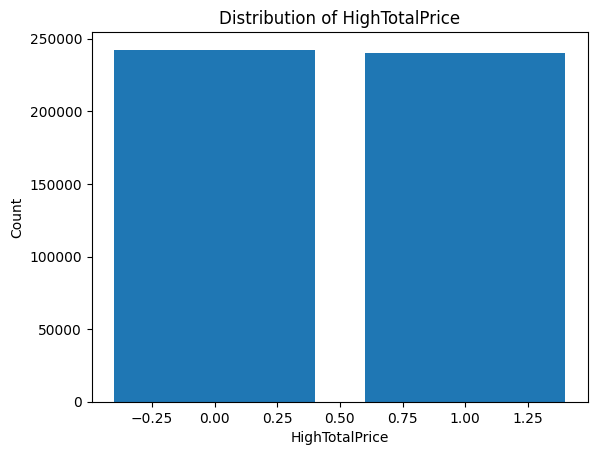

In [394]:
import matplotlib.pyplot as plt

class_counts = cleaned_df['HighTotalPrice'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('HighTotalPrice')
plt.ylabel('Count')
plt.title('Distribution of HighTotalPrice')
plt.show()



# Encoding Categorical column

In [395]:
from sklearn.preprocessing import LabelEncoder
df_new=cleaned_df.copy()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the 'Country' column and transform it
df_new['Country_Encoded'] = label_encoder.fit_transform(df_new['Country'])

In [396]:
df_new_cleaned=df_new[['Quantity','UnitPrice','Country_Encoded','HighTotalPrice']]

df_new_cleaned.tail(100)

,Quantity,UnitPrice,Country_Encoded,HighTotalPrice
482153,10,2.08,14,1
482154,6,2.08,14,1
482155,10,1.65,14,1
482156,10,1.65,14,1
482157,12,1.25,14,1
...,...,...,...,...
482248,12,0.85,13,1
482249,6,2.10,13,1
482250,4,4.15,13,1
482251,4,4.15,13,1


# Scaling columns (Quantity, Unitprice)

In [397]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
numerical_features = ['Quantity', 'UnitPrice']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features and transform them
df_new_cleaned[numerical_features] = scaler.fit_transform(df_new_cleaned[numerical_features])

In [399]:
df_new_cleaned.tail(10)

,Quantity,UnitPrice,Country_Encoded,HighTotalPrice
482243,-0.253088,0.186963,13,1
482244,-0.253088,0.186963,13,1
482245,0.194096,-0.365017,13,1
482246,0.641281,-0.365017,13,1
482247,-0.253088,0.309625,13,1
482248,0.641281,-0.702337,13,1
482249,-0.029496,-0.319018,13,1
482250,-0.253088,0.309625,13,1
482251,-0.253088,0.309625,13,1
482252,-0.364884,0.554949,13,1


# Split Data

In [400]:
# Select features and target variable
features = ['Quantity', 'UnitPrice']
X = df_new_cleaned[features]
y = df_new_cleaned['HighTotalPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [401]:
nan_counts = df_new_cleaned['HighTotalPrice'].isnull().sum()
print(nan_counts)

0


 # Build the Neural Network:

In [402]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model:

In [404]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
10550/10550 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9927 - loss: 0.0193
Epoch 2/10
10550/10550 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9944 - loss: 0.0162
Epoch 3/10
10550/10550 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9953 - loss: 0.0142
Epoch 4/10
10550/10550 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9952 - loss: 0.0147
Epoch 5/10
10550/10550 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9956 - loss: 0.0137
Epoch 6/10
10550/10550 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9964 - loss: 0.0110
Epoch 7/10
10550/10550 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9965 - loss: 0.0104
Epoch 8/10
10550/10550 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9966 - loss: 0.0105
Epoch 9/10
10550/10550 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9968 - loss: 0.0093
Epoch 10/10
10550/10550 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9972 - loss: 0.0087


#  Evaluate the Model:

In [405]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4522/4522 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9984 - loss: 0.0073
Test Loss: 0.0069
Test Accuracy: 0.9986


## we notied the accuracy for this model is :0.999